# Comp6481 / 8481 coursework 2024 

We will be working with data from https://www.kaggle.com/datasets/sethpoly/application-rejection-emails 

*Detect Reject Emails* by SethPoly@kaggle


# Part A

This notebook contains the questions for Part A of the practical coursework. 

Please ensure that this notebook is stored in a folder which also has the `Rejection Data - Sheet1.csv` data file

When you answer these questions, include in your submission for Part A your answers and the code that you used. 

The most straightforward way to do this is to complete Part A within this Jupyter notebook. *Please add your answers and code per question in the indicated cells.*

You can instead submit a separate python file for Part A if this is preferable for you, but remember to include:
* your code 
* comments that: 
 * clearly indicate which question each code snippet relates to, 
 * contain the answer to that question.

Part A is worth 20 marks in total. Each question is annotated with the number of marks that question is worth. In each question, half the marks are awarded for the code and half the marks are awarded for correct answers to the question.

***Cells are provided for you to complete your answers in this notebook. Please do not edit any of the existing code and markdown already provided in this Jupyter notebook.***

You are welcome to extend this notebook also for your Part B work, though you could also use a different notebook or python file. Please add any working for Part B at the end of this notebook if you wish to use this notebook for Part B work too.


**************************************************************************************
* Start of code adapted from https://www.kaggle.com/code/sethpoly/detect-reject-emails
* The majority of code extracted from the original notebook is commented out below, but included for completeness
**************************************************************************************

# Detect Reject emails

Author: Sethpoly@kaggle

Link: https://www.kaggle.com/code/sethpoly/detect-reject-emails

## Used to detect the rejection emails from jobs applied to.


In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv).
from gensim.models import Word2Vec
import nltk

df = pd.read_csv('Rejection Data - Sheet1.csv')
df.tail()

,Email,Status
124,"Starting March 17, 2021, eBay will no longer ...",not_reject
125,"Hi Seth,\n\nI want to make finding a great rem...",not_reject
126,"Hello Seth,\n\nI just wanted to take a second ...",not_reject
127,Your free YouMail plan includes 20 in-app tran...,not_reject
128,\nSupport resources for developers at all leve...,not_reject


In [25]:
import string
import matplotlib.pyplot as plt
import nltk


# For the purposes of this assessment, all text processing actions in this cell have been removed except the replacement of newline characters by space characters

# convert email text to lowercase
#df.Email = df.Email.apply(lambda x: x.lower())
# remove punctuation
#df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))
# remove numbers
#df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('','','1234567890')))
# remove newline tags
df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('\n',' ')))
df.tail()



,Email,Status
124,"Starting March 17, 2021, eBay will no longer ...",not_reject
125,"Hi Seth, I want to make finding a great remot...",not_reject
126,"Hello Seth, I just wanted to take a second to...",not_reject
127,Your free YouMail plan includes 20 in-app tran...,not_reject
128,Support resources for developers at all level...,not_reject


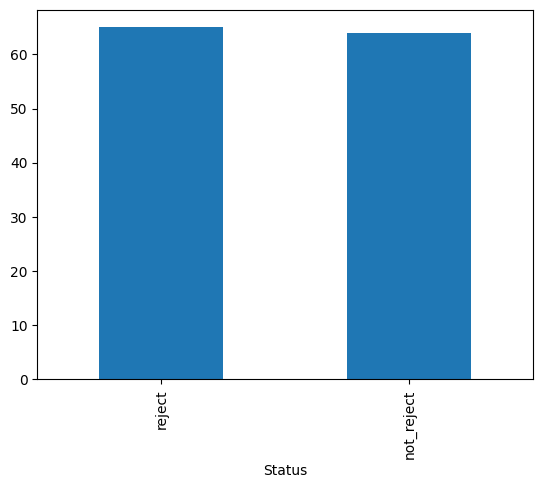

In [26]:
df.Status.value_counts().plot(kind='bar')
plt.show()

In [27]:
# Add a column 'Tokens' to df, to hold the email contents as a list of tokens
df['Tokens'] = [nltk.word_tokenize(e) for e in df.Email]

print(df.Tokens[0])

['Thank', 'you', 'for', 'applying', 'to', 'the', 'Junior', 'Software', 'Developer', 'position', 'at', 'MSC', 'Technology', '.', 'Unfortunately', ',', 'MSC', 'Technology', 'has', 'moved', 'to', 'the', 'next', 'step', 'in', 'their', 'hiring', 'process', ',', 'and', 'your', 'application', 'was', 'not', 'selected', 'at', 'this', 'time', '.']


In [28]:
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
#from sklearn.preprocessing import LabelEncoder
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import classification_report

# pull data into vectors to create collection of text/tokens
#vectorizer = CountVectorizer()
#x = vectorizer.fit_transform(df.Email)

#encoder = LabelEncoder()
#y = encoder.fit_transform(df.Status)

# split into train and test sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Shape of sets
#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)

In [29]:
#%%time
#nb = MultinomialNB()
#nb.fit(x_train, y_train)

In [30]:
#def predict_reject(email):
#    category_names = {'reject':'reject','not_reject':'not-reject'}
#    cod = nb.predict(vectorizer.transform([email]))
#    return category_names[encoder.inverse_transform(cod)[0]]

#print(predict_reject('Unfortunately we will not be moving forward'))
#print(predict_reject('I found some job listings you may be interested in'))
#print(predict_reject('We were very fortunate to have a strong group of applicants to consider for this role and have recently filled this position. Unfortunately, because this role is no longer available, we will not be moving forward with your application.'))
#print(predict_reject(''))


In [31]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.multiclass import OneVsRestClassifier

# Init the classfifier
#clf = OneVsRestClassifier(LogisticRegression())

# Fit classifier to training data
#clf.fit(x_train, y_train)

# Print accuracy
#print(f'Accuracy: {clf.score(x_test, y_test)}')

In [32]:
#x_test_clv_pred = clf.predict(x_test)
#confusion_matrix(y_test, x_test_clv_pred)
#print(classification_report(y_test, x_test_clv_pred, target_names=encoder.classes_))

 - Inspiration and code samples from https://towardsdatascience.com/i-built-a-reject-not-reject-email-classifier-for-my-job-applications-844a3b6cd67e

**************************************************************************************
* End of code adapted from https://www.kaggle.com/code/sethpoly/detect-reject-emails
**************************************************************************************

# Coursework questions for Part A:

For each question, please add your code to the empty code cell below the question, and please add any written answers/comments to the empty markdown cell below the question, as indicated. 

***You are allowed to add additional code markdown cells as needed below this point. Please do not edit any of the existing code and markdown already provided in this Jupyter notebook.***


## Q1 [2 marks]

Add a column to the `df` data frame named `Length`, which holds the number of tokens in the tokenised list representing that email (i.e. the number of items in the list in `df.Tokens` for each row)

In [33]:
# Answer to Q1
df['Length'] = [len(tokens) for tokens in df ['Tokens']]


In [34]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
print(df['Length'])


0       39
1       47
2      139
3       49
4       81
      ... 
124    133
125     87
126     58
127     34
128    146
Name: Length, Length: 129, dtype: int64


## Q2. 

### Q2a [2 marks] 

Choose an appropriate visualisation to create a visualisation of the Length and Status data in `df`, after you have completed Q1.

You can consult the lectures on visualisation and also use the following docs to help guide you and give you inspiration:

https://matplotlib.org/stable/plot_types/basic/index.html
https://realpython.com/pandas-plot-python/
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
https://www.w3schools.com/python/matplotlib_intro.asp

### Q2b [2 marks] 

Give a brief comment in the markdown box below about why you have chosen the visualisation you did, with reference to the type of data you are visualising.

Add a comment answering the question: "Do you see any patterns in your visualisation of the data frame data on email Length and email Status?"

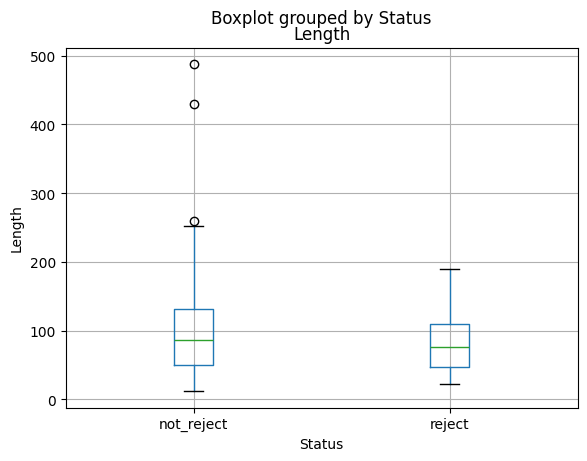

In [35]:
# Answer to Q2a
df.boxplot(column='Length', by='Status')
plt.xlabel('Status')
plt.ylabel('Length')
plt.show()

Write your answer to Q2b here:

I chose a boxplot because it is a good balance of displaying the status which is categorical data and the length which is numerical data. It also shows outliers clearly as well as interquartile range which is the box, median which is the green line and the minimum and maximum values at the bottom and top and you can see the not_reject email has more outliers and a higher maximum than the reject.

Also Not_reject emails contain more tokens then reject tokens




## Q3. [4 marks] 

We have defined a measure of `lexical richness` as: the number of unique tokens in a text, divided by the total number of tokens in that text. 

[We have also defined a second measure: how many times, on average, is each token used in the text? We will *not* use that measure here.]

Add a column to the data frame `df` named `LexRich`, which calculates the lexical richness for each email in the dataset.



In [36]:
# Answer for Q3
df['LexRich'] = [len(set(tokens)) / len(tokens) for tokens in df['Tokens']]


In [37]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
print(df['LexRich'])

0      0.820513
1      0.765957
2      0.669065
3      0.673469
4      0.703704
         ...   
124    0.556391
125    0.735632
126    0.793103
127    0.794118
128    0.719178
Name: LexRich, Length: 129, dtype: float64


## Q4. 

For Q4a and Q4b, note that we can access all the data in df with the Status = 'reject', using this code:

print(df[df.Status=='reject'])

###  Q4a: [4 marks] 

Calculate two variables, `lex_reject` and `lex_not_reject`
* `lex_reject' = the mean lexical richness for the `reject' emails
* `lex_not_reject' = the mean lexical richness for the `not_reject' emails

###  Q4b: [2 marks] 
Comment briefly on the difference: what does this tell us about how the variety of vocabulary use differs between reject emails and not_reject emails? [approx 2-4 sentences]

In [38]:
# We can access all the data in df with the Status = 'reject', using this code:
print(df[df.Status=='reject'])

                                                Email  Status  \
0   Thank you for applying to the Junior Software ...  reject   
1   Thank you for your interest in the Train To Hi...  reject   
2   eth,   Thank you for your interest in Exyn and...  reject   
3   Thank you for your interest in the Software En...  reject   
4   Hi Seth,  Thank you for your interest in PathA...  reject   
..                                                ...     ...   
60  Thank you for your interest in the 2020-45452 ...  reject   
61  Thank you for your interest in the SOFTWARE EN...  reject   
62  Thank you for your interest in UPS and the "So...  reject   
63  Thank you for applying for the position of 014...  reject   
64  Thank you for your interest in The Allen Insti...  reject   

                                               Tokens  Length   LexRich  
0   [Thank, you, for, applying, to, the, Junior, S...      39  0.820513  
1   [Thank, you, for, your, interest, in, the, Tra...      47  0.765957

In [39]:
# Answer for Q4a
lex_reject = df[df.Status == 'reject']['LexRich'].mean()
lex_not_reject = df[df.Status == 'not_reject']['LexRich'].mean()

In [40]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
print(lex_reject)
print(lex_not_reject)

0.7224843001105477
0.7282174937343919


Write your answer for Q4b here:

<b>
the top one which is for reject emails shows us that 72.2% of the tokens in rejection emails were unique to each email because we were looking for the mean richness.


the bottom one which is for not_reject is 72.8% lexically rich so meaning that 72.8% of the tokens are unique to each not_reject email.

As we can see there is a very slight diffrence in reject and not_reject emails lexical richness however, it is very small which concludes that the variety of vocabulary used is not to dissimilar between reject and non_reject emails
</b>


## Q5. [4 marks]

Train a Word2Vec model called `model` using the following input parameters:
* `sentences` as the data in `df.Tokens`
* a `vector_size` of 100
* a `window` of 5
* a `min_count` of 1
* a `workers` of 4

Using your Word2Vec `model`, list the top 20 most similar tokens to the token `developer`.

In [41]:
# Answer to Q5 
model = Word2Vec(sentences=df.Tokens, vector_size=100, window=5, min_count=1, workers=4)

In [42]:
similar_words = model.wv.most_similar('developer', topn=20)

for token, similarity in similar_words:
    print(token, ":", similarity)



1 : 0.9165237545967102
want : 0.9133905172348022
move : 0.9120628237724304
visit : 0.9111905097961426
reviewed : 0.9109075665473938
any : 0.9107699990272522
been : 0.9104707837104797
ago : 0.9104697108268738
clients : 0.9101900458335876
but : 0.9101880192756653
what : 0.9100486636161804
consider : 0.9099218845367432
experience : 0.9097030162811279
also : 0.9095575213432312
one : 0.9095483422279358
position : 0.9095293283462524
success : 0.9094367623329163
fit : 0.9094114899635315
how : 0.9094082117080688
interest : 0.9093652963638306


# End of Part A

If you wish to use this notebook for any code or calculations for Part B, please do so by adding cells below here.

In [43]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

rejection_emails = df[df['Status'] == 'reject']

rejection_tokens = [word for email in rejection_emails['Email'] for word in email.split() if word.lower() not in stop_words]

word_counts = Counter(rejection_tokens)

total_words = sum(word_counts.values())
sorted_word_frequencies = sorted(((word, count / total_words) for word, count in word_counts.items()), key=lambda x: x[1], reverse=True)



for word, frequency in sorted_word_frequencies[:30]:
    raw_count = word_counts[word]  # Raw count of the word
    print(f"{word}: {frequency} (Raw count: {raw_count})")


interest: 0.030181086519114688 (Raw count: 75)
Thank: 0.026559356136820925 (Raw count: 66)
Software: 0.018108651911468814 (Raw count: 45)
Unfortunately,: 0.017303822937625755 (Raw count: 43)
position: 0.016498993963782696 (Raw count: 41)
forward: 0.013682092555331992 (Raw count: 34)
time: 0.012877263581488933 (Raw count: 32)
appreciate: 0.010865191146881288 (Raw count: 27)
Engineer: 0.01006036217303823 (Raw count: 25)
time.: 0.008853118712273641 (Raw count: 22)
job: 0.008853118712273641 (Raw count: 22)
decided: 0.008450704225352112 (Raw count: 21)
wish: 0.008450704225352112 (Raw count: 21)
best: 0.008450704225352112 (Raw count: 21)
application: 0.008048289738430584 (Raw count: 20)
Developer: 0.007645875251509054 (Raw count: 19)
move: 0.007243460764587525 (Raw count: 18)
Regards,: 0.007243460764587525 (Raw count: 18)
moving: 0.006841046277665996 (Raw count: 17)
career: 0.006438631790744467 (Raw count: 16)
applying: 0.006036217303822937 (Raw count: 15)
next: 0.006036217303822937 (Raw cou

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kiera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

non_rejection_emails = df[df['Status'] == 'not_reject']

non_rejection_tokens = [word for email in non_rejection_emails['Email'] for word in email.split() if word.lower() not in stop_words]

counts_non_rejection = Counter(non_rejection_tokens)

total_words_non_rejection = sum(counts_non_rejection.values())
sorted_word_frequencies_non_rejection = sorted(((word, count / total_words_non_rejection) for word, count in counts_non_rejection.items()), key=lambda x: x[1], reverse=True)

for word, frequency in sorted_word_frequencies_non_rejection[:30]:
    raw_count = counts_non_rejection[word]  # Raw count of the word
    print(f"{word}: {frequency} (Raw count: {raw_count})")


-: 0.012188208616780046 (Raw count: 43)
Software: 0.01020408163265306 (Raw count: 36)
Engineer: 0.007086167800453515 (Raw count: 25)
Thank: 0.006802721088435374 (Raw count: 24)
application: 0.005668934240362812 (Raw count: 20)
job: 0.005385487528344671 (Raw count: 19)
get: 0.00510204081632653 (Raw count: 18)
Detective: 0.00510204081632653 (Raw count: 18)
please: 0.0045351473922902496 (Raw count: 16)
experience: 0.0045351473922902496 (Raw count: 16)
*: 0.0045351473922902496 (Raw count: 16)
Please: 0.004251700680272109 (Raw count: 15)
know: 0.003968253968253968 (Raw count: 14)
email: 0.003968253968253968 (Raw count: 14)
resume: 0.003968253968253968 (Raw count: 14)
Reasoning: 0.003968253968253968 (Raw count: 14)
interest: 0.0036848072562358277 (Raw count: 13)
Developer: 0.0036848072562358277 (Raw count: 13)
Team: 0.003401360544217687 (Raw count: 12)
free: 0.003401360544217687 (Raw count: 12)
us: 0.003401360544217687 (Raw count: 12)
account: 0.003401360544217687 (Raw count: 12)
development

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kiera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sentimentanalyser = SentimentIntensityAnalyzer()

reject_emails = df[df['Status'] == 'reject']

for email_text in reject_emails['Email']:
    sentiment_data = sentimentanalyser.polarity_scores(email_text)
    print(email_text)
    print(f"Sentiment scores: {sentiment_data}")

    # Determine the overall sentiment
    if sentiment_data['compound'] >= 0.05:
        print("Positive")
    elif sentiment_data['compound'] <= -0.05:
        print("Negative")
    else:
        print("Neutral")
    print()


Thank you for applying to the Junior Software Developer position at MSC Technology. Unfortunately, MSC Technology has moved to the next step in their hiring process, and your application was not selected at this time.
Sentiment scores: {'neg': 0.063, 'neu': 0.871, 'pos': 0.066, 'compound': 0.0258}
Neutral

Thank you for your interest in the Train To Hire - Junior Software Developer position at Mindlance in Chicago, Illinois, United States. Unfortunately, we will not be moving forward with your application, but we appreciate your time and interest in Mindlance.
Sentiment scores: {'neg': 0.035, 'neu': 0.695, 'pos': 0.27, 'compound': 0.8885}
Positive

eth,   Thank you for your interest in Exyn and for applying to be apart of our team as a Software Engineer, Product. We appreciate the opportunity to learn more about you and your professional accomplishments.  We were fortunate to have received so many terrific applications.  Although we were impressed with your background, we have decided 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kiera\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [46]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sentimentanalyser = SentimentIntensityAnalyzer()

non_rejection_emails = df[df['Status'] == 'not_reject']

for email_text in non_rejection_emails['Email']:
    sentiment_data = sentimentanalyser.polarity_scores(email_text)
    print(email_text)
    print(f"Sentiment scores: {sentiment_data}")

    # Determine the overall sentiment
    if sentiment_data['compound'] >= 0.05:
        print("Positive")
    elif sentiment_data['compound'] <= -0.05:
        print("Negative")
    else:
        print("Neutral")
    print()


Seth Polyniak,  As part of your application to Entry Level Back End Developer: 2021, we recently invited you to complete our Coding Assessment.  We wanted to let you know that your responses have been received and are being considered, along with other information from your application process, to determine next steps. These next steps may include being invited to complete another assessment or invitation to an interview.  Please note that if you did not just complete an assessment, this means that your responses were returned from a prior application to IBM and completion of the same assessment. As your assessment responses remain valid for 12 months, there is no need to retake this assessment at this time.  IBM Assessment Team
Sentiment scores: {'neg': 0.018, 'neu': 0.963, 'pos': 0.019, 'compound': 0.0258}
Neutral

Hello Seth,  Thank you for expressing interest in iCIMS, a high-growth recruitment software solutions provider! After reviewing your resume, we feel that your background a

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kiera\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
